<a href="https://colab.research.google.com/github/MADURAAGANESH-N/design/blob/main/Plastic_Waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
num_samples = 100

# Generate synthetic data
# Features could represent various characteristics of plastic waste detection
plastic_size = np.random.uniform(0.1, 2.0, num_samples)  # Size of plastic pieces in meters
plastic_color = np.random.randint(0, 3, num_samples)     # Color encoded as integers (0: clear, 1: colored, 2: dark)
water_depth = np.random.uniform(0, 10, num_samples)       # Depth of water in meters
temperature = np.random.uniform(15, 30, num_samples)       # Water temperature in degrees Celsius

# Generating a binary target variable based on a condition
# This is just an example: larger size and certain colors favor detection
sustainability = [
    1 if (size > 0.5 and color == 1 and depth < 5) else 0
    for size, color, depth in zip(plastic_size, plastic_color, water_depth)
]

# Create DataFrame
data = pd.DataFrame({
    'plastic_size': plastic_size,
    'plastic_color': plastic_color,
    'water_depth': water_depth,
    'temperature': temperature,
    'sustainability': sustainability
})

# Display the first few rows
print(data.head())

# Optionally, save to CSV for later use
data.to_csv('plastic_waste_data.csv', index=False)

   plastic_size  plastic_color  water_depth  temperature  sustainability
0      0.811626              2     5.908929    19.403878               0
1      1.906357              2     6.775644    27.140417               0
2      1.490788              0     0.165878    27.151701               0
3      1.237451              0     5.120931    28.006085               0
4      0.396435              1     2.264958    28.698608               0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('plastic_waste_data.csv')

# Inspect for missing values and general structure
print(data.head())
print(data.isnull().sum())

# Handle missing values if necessary
data.fillna(data.mean(), inplace=True)

   plastic_size  plastic_color  water_depth  temperature  sustainability
0      0.811626              2     5.908929    19.403878               0
1      1.906357              2     6.775644    27.140417               0
2      1.490788              0     0.165878    27.151701               0
3      1.237451              0     5.120931    28.006085               0
4      0.396435              1     2.264958    28.698608               0
plastic_size      0
plastic_color     0
water_depth       0
temperature       0
sustainability    0
dtype: int64


In [ ]:
# Example feature selection
X = data[['plastic_size', 'plastic_color', 'water_depth', 'temperature']]
y = data['sustainability']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


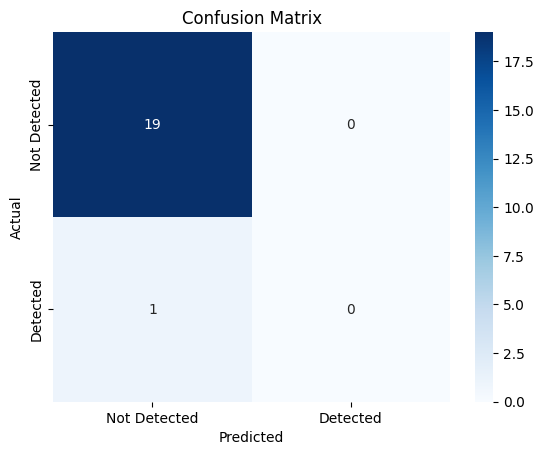

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Detected', 'Detected'],
            yticklabels=['Not Detected', 'Detected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Detected', 'Detected']))

              precision    recall  f1-score   support

Not Detected       0.95      1.00      0.97        19
    Detected       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Feature importance (coefficients)
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

               Coefficient
plastic_size      0.834170
plastic_color     0.248185
water_depth      -0.552668
temperature       0.133112


In [ ]:
# Save the model to a file
import joblib
joblib.dump(model, 'plastic_waste_detection_model.pkl')

['plastic_waste_detection_model.pkl']